# Calendar Analysis

Load calendar data. Create plots that count the frequency of a type of event per year, month, week. 

## First. Load calendar data from ics file. Convert to pandas DataFrame

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from icalendar import Calendar, Event
from datetime import datetime

dates = []
file = open('cal.ics','rb')
cal = Calendar.from_ical(file.read())

for e in cal.walk():
    if e.get('summary') == 'x' or e.get('summary') == 'X':
         dates.append(e.get('dtstart').dt.strftime("%Y-%m-%d"))

ts = pd.DataFrame(np.ones(len(dates)),index=dates)

ts["dates"] = pd.to_datetime(dates)


### Plot event per year

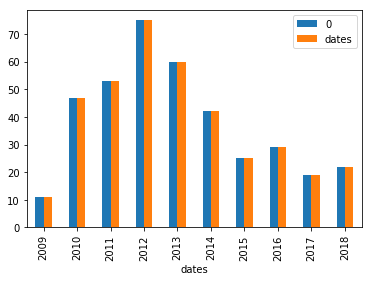

In [10]:
ts.groupby(ts["dates"].dt.year).count().plot(kind="bar")
plt.show()

That's not too bad.  But, what's the deal with the two bars? 0 and dates? Must fix. #TODO

### Per Month

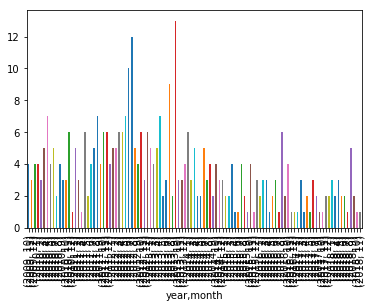

In [9]:
ts['dates'].groupby([ts.dates.dt.year.rename('year'), ts.dates.dt.month.rename('month')]).agg('count').plot(kind='bar')
plt.show()

Okay, that looks gross!! Let's see how we can do better, 

First, let's make the figure bigger. See if that makes it better.

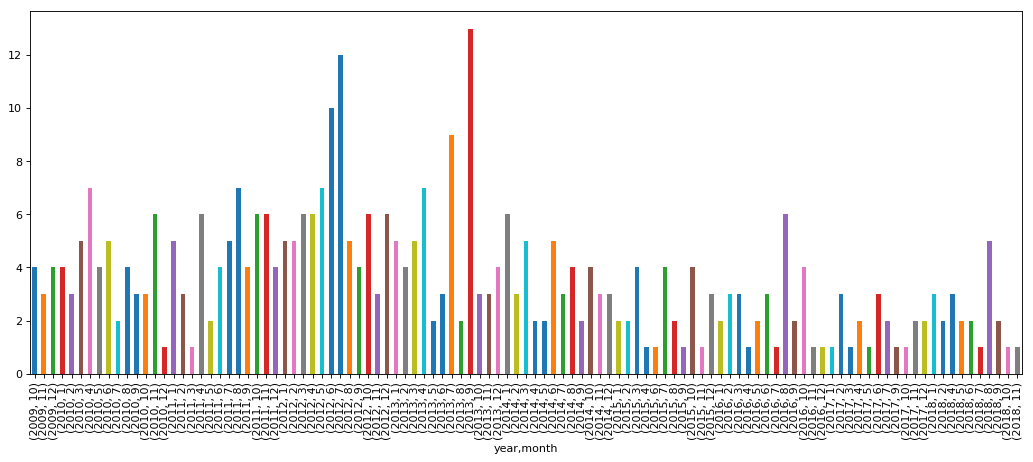

In [40]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(16, 6), dpi=80, facecolor='w', edgecolor='k')

ts['dates'].groupby([ts.dates.dt.year.rename('year'), ts.dates.dt.month.rename('month')]).agg('count').plot(kind='bar')



It's nice that it's bigger. But I can't read the x axis. Let's get rid of that for now. 

year  month
2009  10       4
      11       3
      12       4
2010  1        4
      2        3
      3        5
      4        7
      5        4
      6        5
      7        2
      8        4
      9        3
      10       3
      11       6
      12       1
2011  1        5
      2        3
      3        1
      4        6
      5        2
      6        4
      7        5
      8        7
      9        4
      10       6
      11       6
      12       4
2012  1        5
      2        5
      3        6
              ..
2016  4        1
      5        2
      6        3
      7        1
      8        6
      9        2
      10       4
      11       1
      12       1
2017  1        1
      2        3
      3        1
      4        2
      5        1
      6        3
      7        2
      9        1
      10       1
      11       2
      12       2
2018  1        3
      2        2
      4        3
      5        2
      6        2
      7        1
      8        5
  

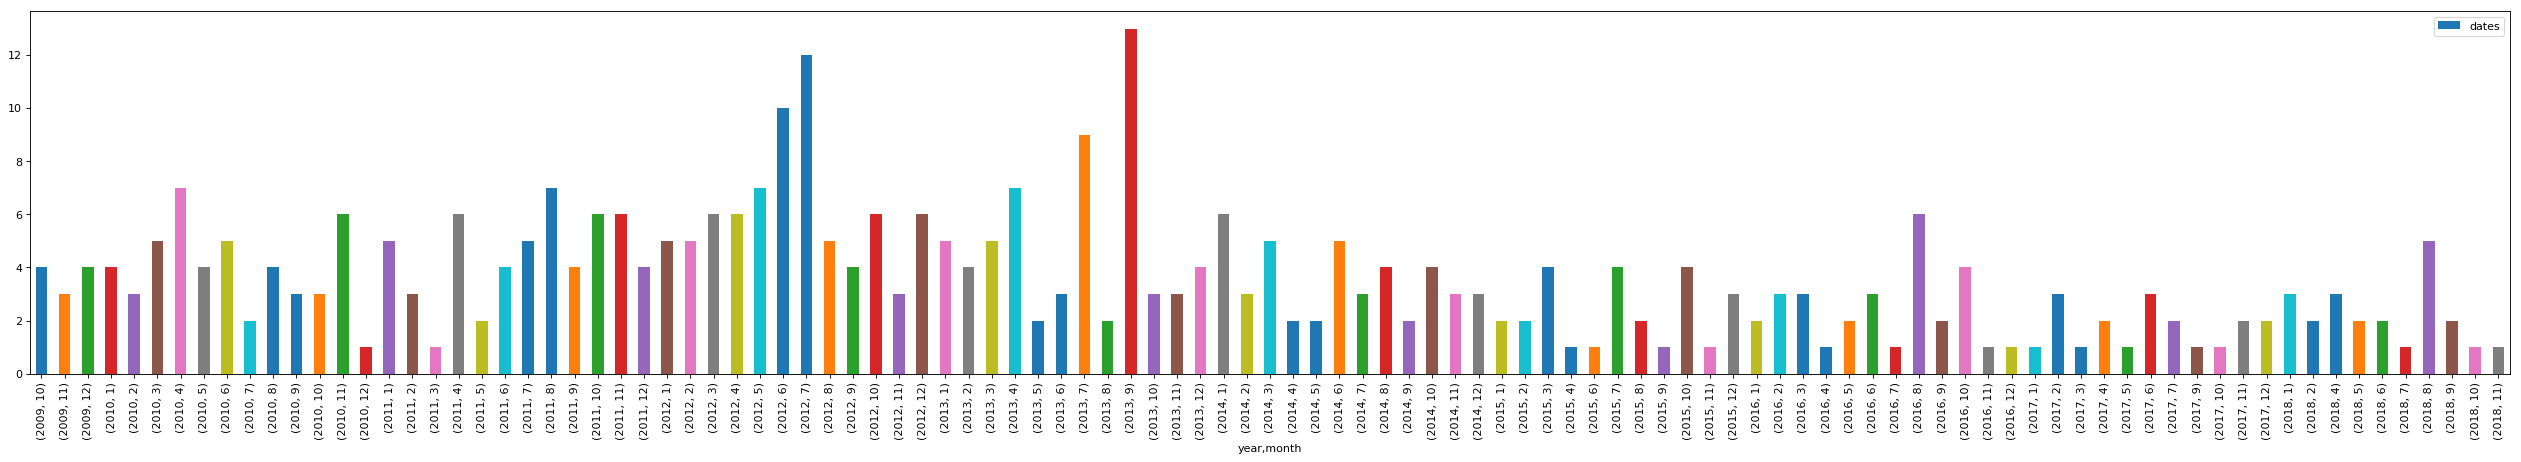

In [39]:
fig = figure(num=None, figsize=(40, 6), dpi=80, facecolor='w', edgecolor='k')

group_by = ts['dates'].groupby([ts.dates.dt.year.rename('year'), ts.dates.dt.month.rename('month')]).agg('count')

print(group_by)
plot = group_by.plot(kind='bar', legend='none')
